## References:
 - https://github.com/ThilinaRajapakse/simpletransformers/tree/master/simpletransformers/classification
 - https://medium.com/@vslovik/fake-news-detection-empowered-with-bert-and-friends-20397f7e1675
 
 - https://stackoverflow.com/questions/56850711/importerror-please-install-apex-from-https-www-github-com-nvidia-apex-to-use 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importing all the dependencies

In [ ]:
import os
import csv
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split

## Simple Transormer library is the way to access bert without pre-processing steps 

In [ ]:
! pip install simpletransformers


     |████████████████████████████████| 204kB 8.1MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 317kB 16.6MB/s 
     |████████████████████████████████| 1.4MB 22.5MB/s 
     |████████████████████████████████| 778kB 59.9MB/s 
     |████████████████████████████████| 3.0MB 56.1MB/s 
     |████████████████████████████████| 163kB 41.8MB/s 
     |████████████████████████████████| 112kB 59.1MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 890kB 52.7MB/s 
     |████████████████████████████████| 1.1MB 53.8MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=959c9f00a680a64369b3de2612687ee37c79eed2091bfe3b633eb383163c41be
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a825835

## Using Classification Model from simple Transformer Library

In [ ]:
from simpletransformers.classification import ClassificationModel

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


## Reading training dataset and competition dataset and storing them in their respective variables

In [ ]:
def baseline(train_stance, train_body):
    # labels as according to the competition
    label_unique = {'agree': int(0), 'disagree':int(1), 'discuss':int(2), 'unrelated':int(3)}
    # Corresponding to train/competition_bodies.csv
    with open(train_body, encoding='utf_8') as b:  
        body = {}
        lines_bodies = csv.reader(b)
        for i, line in enumerate(tqdm(list(lines_bodies), ncols=80, leave=False)):
            if i > 0:
                id_body = int(line[0].strip())
                body[id_body] = line[1]
    # Corresponding to train/competition_stances.csv
    with open(train_stance, encoding='utf_8') as hbl: 
        lines_hbl = csv.reader(hbl)
        #h coressponds to headlines, b corresponds to body  and l corresponds to labels
        h = []# headline
        b = []# body
        l = []# labels
        for i, line in enumerate(tqdm(list(lines_hbl), ncols=80, leave=False)):
            if i > 0:
                id_body = int(line[1].strip())
                labels = line[2].strip()
                if labels in label_unique and id_body in body:
                    h.append(line[0])
                    l.append(label_unique[line[2]])
                    b.append(body[id_body])
    return h, b, l

# Forming training and validation dataframes
data_dir = '/content/drive/My Drive/641'
headlines, bodies, labels = baseline(os.path.join(data_dir, 'train_stances.csv'),os.path.join(data_dir, 'train_bodies.csv'))
# using the zip function so as to form the training dataframe in a single line
combined_form_train = list(zip(headlines, bodies, labels))
Training_set = pd.DataFrame(combined_form_train, columns=['headlines', 'bodies', 'labels'])
#Splitting the training dataset into train and validation set
training_df, validation_df = train_test_split(Training_set,random_state=42,test_size=0.1)
# validation labels
labels_validation = pd.Series(validation_df['labels'])
#Forming testing dataframes
headlines, bodies, labels = baseline(os.path.join(data_dir, 'competition_test_stances.csv'),os.path.join(data_dir, 'competition_test_bodies.csv'))
# using the zip function so as to form the testing dataframe in a single line
combined_form_test = list(zip(headlines, bodies, labels))
#test dataframe
testing_df = pd.DataFrame(combined_form_test, columns=['headlines', 'bodies', 'labels'])
#testing labels
labels_testing = pd.Series(testing_df['labels'])

In [ ]:
#shape of the validation set
validation_df.shape

(4998, 3)

In [ ]:
#shape of the training set
training_df.shape

(44974, 3)

In [ ]:
#shape of the testing set
testing_df.shape

(25413, 3)

In [ ]:
#training set dataframe
training_df

,headlines,bodies,labels
44610,'There is no limit to their depravity' Islamic...,A British man who went to fight against Islami...,2
10499,Amazon.com to open first physical store in Man...,A short video clip has been circulating online...,3
43957,ISIS fighters 'have contracted Ebola': World H...,Militants from Islamic State (Isis) claimed to...,3
49559,IS militant 'Jihadi John' named as Mohammed Em...,North Korea's Kim Jong-un has piled on so much...,3
1851,Sugarhill Gang Rapper ‘Big Bank Hank’ Dies at 57,"On the same day Michael Brown was buried, a Fe...",3
...,...,...,...
11284,Boko Haram Denies Nigeria Cease-Fire Claim,Jose Canseco was injured in an accidental shoo...,3
44732,DNA tests prove Lebanon IS holding ISIS chief ...,BEIRUT — Lebanon’s military has detained a wif...,2
38158,"Sorry, Fido. Pope Francis did NOT say our pets...",If you're already using iOS 8's iCloud Drive f...,3
860,Is Kim Jong-un’s sister now the power behind t...,Arrived in the convent of Macerata in June las...,3


In [ ]:
#validation set dataframe
validation_df

,headlines,bodies,labels
17851,‘Photo of slain IS leader’ reported to be doct...,(IraqiNews.com) Thousands of social media user...,2
6400,Report: A Radically Redesigned 12-Inch MacBook...,"On Monday morning, a report surfaced claiming ...",3
6653,iOS 8 bug could delete your iCloud Drive docum...,Updated at 11:45 p.m. ET\n\nThere was an unexp...,3
44559,"Boko Haram Could Release Kidnapped Girls, Nige...",Militant group Boko Haram is reportedly holdin...,2
37749,ISIS Video Shows Execution of David Cawthorne ...,WARNING: GRAPHIC IMAGES. A masked militant cla...,3
...,...,...,...
7029,What Glenn Beck Fears May Be Done With the 11 ...,Forget sweater weather and crisp autumn leaves...,3
33047,The Internet Tried To Make Axl Rose Its Latest...,Those caught with the same moniker as the dict...,3
44208,Meteorite 'caused mysterious boom in Nicaragua',Islamic State militants and sympathisers are t...,3
14163,Banksy 'Arrested & Real Identity Revealed' Is ...,Wanted: Islamic State group chief Abu Bakr al-...,3


In [ ]:
#testing dataframe
testing_df

,headlines,bodies,labels
0,Ferguson riots: Pregnant woman loses eye after...,A RESPECTED senior French police officer inves...,3
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,Dave Morin's social networking company Path is...,3
2,A Russian Guy Says His Justin Bieber Ringtone ...,A bereaved Afghan mother took revenge on the T...,3
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",Hewlett-Packard is officially splitting in two...,3
4,Argentina's President Adopts Boy to End Werewo...,An airline passenger headed to Dallas was remo...,3
...,...,...,...
25408,The success of the Affordable Care Act is a hu...,"Congressional Republicans, evidently hoping th...",0
25409,The success of the Affordable Care Act is a hu...,Did Obamacare work?\n\nIt’s worth reflecting u...,2
25410,The success of the Affordable Care Act is a hu...,Millions may lose coverage next year if Congre...,1
25411,The success of the Affordable Care Act is a hu...,"Come November, the grim trudge across the incr...",1


In [ ]:
#make cuda available to use , else, we have to set cuda =False when we define instance of the transformer model
import os, sys, shutil
import time
import gc
from contextlib import contextmanager
from pathlib import Path
import random
import numpy as np, pandas as pd
from tqdm import tqdm, tqdm_notebook

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

USE_APEX = True

if USE_APEX:
            with timer('install Nvidia apex'):
              
                os.system('git clone https://github.com/NVIDIA/apex; cd apex; pip install -v --no-cache-dir' + 
                          ' --global-option="--cpp_ext" --global-option="--cuda_ext" ./')
                os.system('rm -rf apex/.git')
                from apex import amp

[install Nvidia apex] done in 419 s


In [ ]:
training_df

,headlines,bodies,labels
44610,'There is no limit to their depravity' Islamic...,A British man who went to fight against Islami...,2
10499,Amazon.com to open first physical store in Man...,A short video clip has been circulating online...,3
43957,ISIS fighters 'have contracted Ebola': World H...,Militants from Islamic State (Isis) claimed to...,3
49559,IS militant 'Jihadi John' named as Mohammed Em...,North Korea's Kim Jong-un has piled on so much...,3
1851,Sugarhill Gang Rapper ‘Big Bank Hank’ Dies at 57,"On the same day Michael Brown was buried, a Fe...",3
...,...,...,...
11284,Boko Haram Denies Nigeria Cease-Fire Claim,Jose Canseco was injured in an accidental shoo...,3
44732,DNA tests prove Lebanon IS holding ISIS chief ...,BEIRUT — Lebanon’s military has detained a wif...,2
38158,"Sorry, Fido. Pope Francis did NOT say our pets...",If you're already using iOS 8's iCloud Drive f...,3
860,Is Kim Jong-un’s sister now the power behind t...,Arrived in the convent of Macerata in June las...,3


In [ ]:
training_df['headlines'] = training_df['headlines'].str.cat(training_df['bodies'],sep=" ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
training_df=training_df[['headlines','labels']]

In [ ]:
training_df=training_df.reset_index(drop=True)

In [ ]:
training_df

,headlines,labels
0,'There is no limit to their depravity' Islamic...,2
1,Amazon.com to open first physical store in Man...,3
2,ISIS fighters 'have contracted Ebola': World H...,3
3,IS militant 'Jihadi John' named as Mohammed Em...,3
4,Sugarhill Gang Rapper ‘Big Bank Hank’ Dies at ...,3
...,...,...
44969,Boko Haram Denies Nigeria Cease-Fire Claim Jos...,3
44970,DNA tests prove Lebanon IS holding ISIS chief ...,2
44971,"Sorry, Fido. Pope Francis did NOT say our pets...",3
44972,Is Kim Jong-un’s sister now the power behind t...,3


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44974 entries, 0 to 44973
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  44974 non-null  object
 1   labels     44974 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 702.8+ KB


## Here we are creatring an instance of transfer model

In [ ]:
def my_model(model1_type,model1_name,number_of_labels,learning_rate,num_train_epochs,reprocess_input_data,overwrite_output_dir,save_eval_checkpoints,save_model_every_epoch,process_count,train_batch_size,eval_batch_size,max_seq_length,fp16,early_stopping):
      
    model = ClassificationModel(model1_type, model1_name,number_of_labels, args={
          'learning_rate':learning_rate,
          'num_train_epochs':num_train_epochs,
          'reprocess_input_data':reprocess_input_data,
          'overwrite_output_dir':overwrite_output_dir,
          'save_eval_checkpoints':save_eval_checkpoints,
          'save_model_every_epoch': save_model_every_epoch,
          'process_count': process_count,
          'train_batch_size':train_batch_size,
          'eval_batch_size':eval_batch_size,
          'max_seq_length':max_seq_length,
          'fp16': fp16,
          
          'early_stopping':early_stopping
      })
    return model
model=my_model('bert','bert-base-uncased',4,4e-5,5,True,True,False,False,10,128,128,128,True,True)
model.train_model(training_df)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:278: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:114: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


In [ ]:
data = {'epochs':  [1, 2,3,4,5],
        'Loss': [0.4577, 0.2657,0.1048,0.0414, 0.0527],
        
        }
df_bert = pd.DataFrame (data, columns = ['epochs','Loss'])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_bert

,epochs,Loss
0,1,0.4577
1,2,0.2657
2,3,0.1048
3,4,0.0414
4,5,0.0527


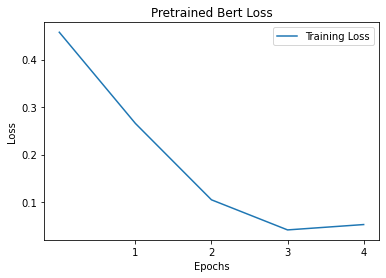

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_bert['Loss'])
plt.xlabel('Epochs')
plt.xticks([1,2,3,4])
plt.ylabel('Loss')
plt.title('Pretrained Bert Loss')
plt.legend(['Training Loss'])
plt.savefig('bert_loss.png')
plt.show()

In [ ]:
# Making one column of text from 2 in validation set
validation_df['headlines'] = validation_df['headlines'].str.cat(validation_df['bodies'],sep=" ")
validation_df=validation_df[['headlines','labels']]
validation_df=validation_df.reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Evaluating the Validation dataset

import numpy as np
a, model_outputs_val, b = model.eval_model(validation_df)

preds_val = np.argmax(model_outputs_val, axis=1)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:751: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
#Checking the validation prediction array
len(preds_val)


4998

In [ ]:
len(labels_validation)

4998

In [ ]:
#Calculating f1 score of individual stances type(validation set)
from sklearn.metrics import f1_score

def calculate_f1scores(y_true, y_predicted):
    
    f1_macro = f1_score(y_true, y_predicted, average='macro')
    f1_classwise = f1_score(y_true, y_predicted, average=None, labels=[0,1,2,3])

    result = "F1 macro: {:.3f}".format(f1_macro * 100) + "% \n"
    result += "F1 agree: {:.3f}".format(f1_classwise[0] * 100) + "% \n"
    result += "F1 disagree: {:.3f}".format(f1_classwise[1] * 100) + "% \n"
    result += "F1 discuss: {:.3f}".format(f1_classwise[2] * 100) + "% \n"
    result += "F1 unrelated: {:.3f}".format(f1_classwise[3] * 100) + "% \n"
    return result
print(calculate_f1scores(preds_val,labels_validation))

F1 macro: 82.819% 
F1 agree: 76.900% 
F1 disagree: 67.039% 
F1 discuss: 89.914% 
F1 unrelated: 97.423% 



In [ ]:
# Replacing the numeric stances with the original stances
pred_true_val=[]
for i in labels_validation:
  if i==0:
    pred_true_val.append('agree')
  elif i==1:
    pred_true_val.append('disagree')
  elif i==2:
    pred_true_val.append('discuss')
  elif i==3:
    pred_true_val.append('unrelated')

pred_val=[]
for i in preds_val:
  if i==0:
    pred_val.append('agree')
  elif i==1:
    pred_val.append('disagree')
  elif i==2:
    pred_val.append('discuss')
  elif i==3:
    pred_val.append('unrelated')
    

In [ ]:
# calculating precision,recall,f1-score,support for validation set
from sklearn.metrics import classification_report

eval_report = classification_report(pred_true_val, pred_val)
print('Test report', eval_report)

Test report               precision    recall  f1-score   support

       agree       0.76      0.78      0.77       331
    disagree       0.78      0.59      0.67       102
     discuss       0.91      0.89      0.90       876
   unrelated       0.97      0.98      0.97      3689

    accuracy                           0.94      4998
   macro avg       0.85      0.81      0.83      4998
weighted avg       0.94      0.94      0.94      4998



In [ ]:
# Printing confusion matrix function and the weighted score function of our model 
LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
LABELS_RELATED = ['unrelated','related']
RELATED = LABELS[0:3]
# score calculating function
def score_submission(gold_labels, test_labels):
    score = 0.0
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        g_stance, t_stance = g, t
        if g_stance == t_stance:
            score += 0.25
            if g_stance != 'unrelated':
                score += 0.50
        if g_stance in RELATED and t_stance in RELATED:
            score += 0.25

        cm[LABELS.index(g_stance)][LABELS.index(t_stance)] += 1

    return score, cm

#confusion matrix function
def print_confusion_matrix(cm):
    lines = []
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    lines.append("-"*line_len)
    lines.append(header)
    lines.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(cm):
        hit += row[i]
        total += sum(row)
        lines.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        lines.append("-"*line_len)
    print('\n'.join(lines))

# reporting the final weighted score on the competition dataset
def report_score(actual,predicted):
    score,cm = score_submission(actual,predicted)
    best_score, _ = score_submission(actual,actual)

    print_confusion_matrix(cm)
    print("Score: " +str(score) + " out of " + str(best_score) + "\t("+str(score*100/best_score) + "%)")
    return score*100/best_score

In [ ]:
# Confusion Matrix and Weighted score for Validation set
report_score(pred_true_val,pred_val)

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    258    |    12     |    26     |    35     |
-------------------------------------------------------------
| disagree  |    24     |    60     |     6     |    12     |
-------------------------------------------------------------
|  discuss  |    27     |     4     |    780    |    65     |
-------------------------------------------------------------
| unrelated |    31     |     1     |    47     |   3610    |
-------------------------------------------------------------
Score: 2025.25 out of 2231.25	(90.76750700280112%)


90.76750700280112

In [ ]:
# Making one column of text from 2 in competition data set
testing_df['headlines'] = testing_df['headlines'].str.cat(testing_df['bodies'],sep=" ")
testing_df=testing_df[['headlines','labels']]
testing_df=testing_df.reset_index(drop=True)

## Evaluating the competition  dataset

In [ ]:
# Evaluating the Competition dataset
import numpy as np
c, model_outputs_test, d = model.eval_model(testing_df)

preds_test = np.argmax(model_outputs_test, axis=1)


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:751: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [ ]:
#Calculating f1 score of individual stances type(Competition set)
from sklearn.metrics import f1_score

def calculate_f1scores(y_true, y_predicted):
    
    f1_macro = f1_score(y_true, y_predicted, average='macro')
    f1_classwise = f1_score(y_true, y_predicted, average=None, labels=[0,1,2,3])

    result = "F1 macro: {:.3f}".format(f1_macro * 100) + "% \n"
    result += "F1 agree: {:.3f}".format(f1_classwise[0] * 100) + "% \n"
    result += "F1 disagree: {:.3f}".format(f1_classwise[1] * 100) + "% \n"
    result += "F1 discuss: {:.3f}".format(f1_classwise[2] * 100) + "% \n"
    result += "F1 unrelated: {:.3f}".format(f1_classwise[3] * 100) + "% \n"
    return result
print(calculate_f1scores(preds_test, labels_testing))

F1 macro: 50.492% 
F1 agree: 42.265% 
F1 disagree: 10.294% 
F1 discuss: 59.688% 
F1 unrelated: 89.720% 



In [ ]:
# Replacing the numeric stances with the original stances
pred_true_test=[]
for i in labels_testing:
  if i==0:
    pred_true_test.append('agree')
  elif i==1:
    pred_true_test.append('disagree')
  elif i==2:
    pred_true_test.append('discuss')
  elif i==3:
    pred_true_test.append('unrelated')

pred=[]
for i in preds_test:
  if i==0:
    pred.append('agree')
  elif i==1:
    pred.append('disagree')
  elif i==2:
    pred.append('discuss')
  elif i==3:
    pred.append('unrelated')

In [ ]:
# calculating precision,recall,f1-score,support for Competition set
from sklearn.metrics import classification_report

eval_report = classification_report(pred,pred_true_test)
print('Test report', eval_report)

Test report               precision    recall  f1-score   support

       agree       0.39      0.46      0.42      1646
    disagree       0.06      0.35      0.10       119
     discuss       0.56      0.64      0.60      3943
   unrelated       0.93      0.87      0.90     19705

    accuracy                           0.80     25413
   macro avg       0.49      0.58      0.50     25413
weighted avg       0.83      0.80      0.82     25413



## Reading the original competition test stances file

In [ ]:
comp_test=pd.read_csv('/content/drive/My Drive/641/competition_test_stances.csv')

In [ ]:
comp_test

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated
...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,agree
25409,The success of the Affordable Care Act is a hu...,2583,discuss
25410,The success of the Affordable Care Act is a hu...,2584,disagree
25411,The success of the Affordable Care Act is a hu...,2585,disagree


In [ ]:
# Foraming architecture set up of the evaluation
evaluate_test_answer = pd.DataFrame(columns=['Headline', 'Body ID', 'Stance'])

In [ ]:
evaluate_test_answer

,Headline,Body ID,Stance


In [ ]:
# predicted values
pred

['unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'agree',
 'unrelated',
 'disagree',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'discuss',
 'discuss',
 'unrelated',
 'agree',
 'unrelated',
 'unrelated',
 'discuss',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',
 'discuss',
 'unrelated',
 'unrelated',
 'unrelated',

In [ ]:
# Adding the column of predicted stances back into architecture set up of the evaluation
evaluate_test_answer['Stance'] = pred

In [ ]:
evaluate_test_answer

,Headline,Body ID,Stance
0,NaN,NaN,unrelated
1,NaN,NaN,unrelated
2,NaN,NaN,unrelated
3,NaN,NaN,unrelated
4,NaN,NaN,unrelated
...,...,...,...
25408,NaN,NaN,agree
25409,NaN,NaN,discuss
25410,NaN,NaN,unrelated
25411,NaN,NaN,unrelated


## Forming complete dataframe of the evaulation we made along with Headline and body ID

In [ ]:
evaluate_test_answer['Headline'] = comp_test['Headline']
evaluate_test_answer['Body ID'] = comp_test['Body ID']

In [ ]:
# printing complete dataframe of the evaulation we made along with Headline and body ID
evaluate_test_answer

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated
...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,agree
25409,The success of the Affordable Care Act is a hu...,2583,discuss
25410,The success of the Affordable Care Act is a hu...,2584,unrelated
25411,The success of the Affordable Care Act is a hu...,2585,unrelated


In [ ]:
comp_test

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated
...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,agree
25409,The success of the Affordable Care Act is a hu...,2583,discuss
25410,The success of the Affordable Care Act is a hu...,2584,disagree
25411,The success of the Affordable Care Act is a hu...,2585,disagree


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(comp_test['Stance'],evaluate_test_answer['Stance'])

0.8016369574627159

## Confusion matrix and the weighted score of our model with respect to the competition dataset

In [ ]:
# Printing confusion matrix function and the weighted score function of our model with respect to the competition datase
report_score(comp_test['Stance'],evaluate_test_answer['Stance'])

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |    750    |    24     |    400    |    729    |
-------------------------------------------------------------
| disagree  |    202    |    42     |    113    |    340    |
-------------------------------------------------------------
|  discuss  |    351    |    39     |   2509    |   1565    |
-------------------------------------------------------------
| unrelated |    343    |    14     |    921    |   17071   |
-------------------------------------------------------------
Score: 7851.0 out of 11651.25	(67.38332796910203%)


67.38332796910203

In [ ]:
evaluate_test_answer.to_csv('bert_base.csv',index=False)